In [1]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import matplotlib as mpl, matplotlib.pyplot as plt, matplotlib.colors as mcolors
%matplotlib inline
from collections import defaultdict
import re
import pandas as pd
import unicodedata
import numpy as np

In [3]:
import requests
from bs4 import BeautifulSoup

url = "https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36"
}

response = requests.get(url, headers=headers)
if response.status_code == 200:
    print("✅ Request successful")
    soup = BeautifulSoup(response.content, "html.parser")
else:
    print("❌ Request failed")
    soup = None

# Initialize these before the loop
desired_table = None
header_row = None
data = []  # ✅ Use lowercase 'data'

# Find the correct table
tables = soup.find_all("table")
for table in tables:
    rows = table.find_all("tr")
    header_row = [cell.text.strip() for cell in rows[0].find_all("th")]
    if "Date" in header_row and "Prison name" in header_row:
        desired_table = table
        break

# Extract rows only if desired_table was found
if desired_table:
    rows = desired_table.find_all("tr")
    for row in rows[1:]:  # skip header
        cells = row.find_all("td")
        row_data = [cell.text.strip() for cell in cells]
        if row_data:  # skip empty rows
            data.append(row_data)  # ✅ Use lowercase 'data'
else:
    print("⚠️ Could not find the desired table.")

# Display result
print("Header:")
print(header_row, "\n")
print("First 2 rows of Data:")
for row in data[:2]:
    print(row)


✅ Request successful
Header:
['Date', 'Prison name', 'Country', 'Succeeded', 'Escapee(s)', 'Details'] 

First 2 rows of Data:
['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan\nCarlos Antonio Contreras Castro', "Kaplan was a New York businessman who had been arrested for murder in 1962 in Mexico City and was incarcerated at the Santa Martha Acatitla prison in the Iztapalapa borough. Joel's sister, Judy Kaplan, arranged the means to help Kaplan escape, and on the aforementioned date, a helicopter landed in the prison yard. The guards mistakenly thought this was an official visit. In two minutes, Kaplan and his cellmate Contreras, a Venezuelan counterfeiter, were able to board the craft and were piloted away, before any shots were fired.[10] Both men were flown to Texas and then different planes flew Kaplan to California and Contreras to Guatemala.[3] The Mexican government never initiated extradition proceedings against Kaplan.[10] The escape is told in a 

In [6]:
import pandas as pd

df = pd.DataFrame(data, columns=header_row)

# Remove the "Details" column
df = df.drop("Details", axis=1)

# To enhance readability, set the maximum column width to 30 characters.
pd.set_option('display.max_colwidth', 30)

print(df[:3])

               Date                    Prison name        Country Succeeded  \
0   August 19, 1971          Santa Martha Acatitla         Mexico       Yes   
1  October 31, 1973          Mountjoy Jail, Dublin        Ireland       Yes   
2      May 24, 1978  United States Penitentiary...  United States        No   

                      Escapee(s)  
0  Joel David Kaplan\nCarlos ...  
1  JB O'HaganSeamus TwomeyKev...  
2  Garrett Brock TrapnellMart...  


In [8]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Group the data by year and count the number of escapes in each year
escapes_per_year = df.groupby('Year').size()

# Print the number of prison escapes per year
print("Prison Escapes per Year:")
print(escapes_per_year)

Prison Escapes per Year:
Year
1971.0    1
1973.0    1
1978.0    1
1981.0    2
1985.0    2
1986.0    3
1987.0    1
1988.0    3
1989.0    2
1990.0    1
1991.0    1
1992.0    1
1993.0    1
1996.0    1
1997.0    1
1999.0    1
2000.0    2
2001.0    3
2002.0    2
2003.0    1
2005.0    1
2006.0    1
2007.0    3
2009.0    3
2010.0    1
2012.0    1
2013.0    2
2014.0    1
2016.0    1
2018.0    1
2020.0    1
dtype: int64


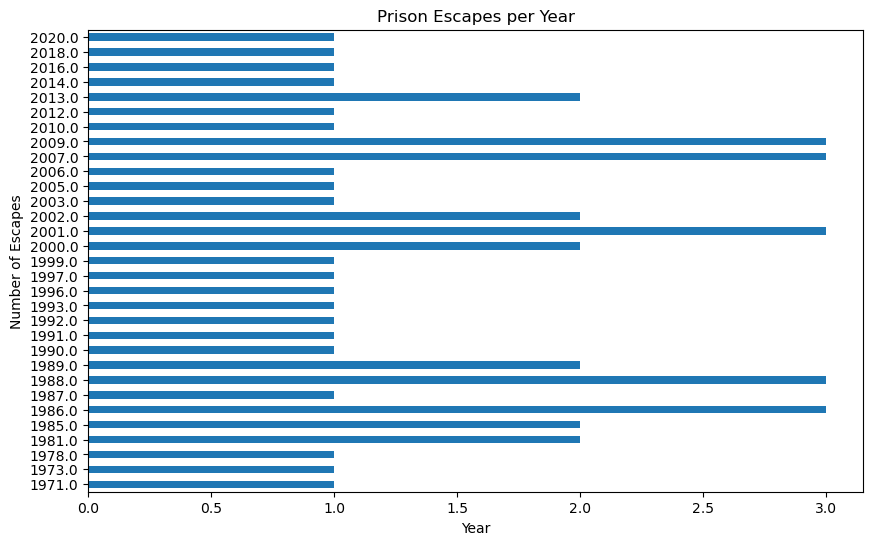

In [10]:
# Plotting the number of prison escapes per year
escapes_per_year.plot(kind='barh', figsize=(10, 6), xlabel='Year', ylabel='Number of Escapes', title='Prison Escapes per Year')
plt.show()

In [11]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month and day of the week from the 'Date' column
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Create a dictionary to map month numbers to month names
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Group the data by month and count the number of escapes in each month
escapes_per_month = df.groupby('Month').size()

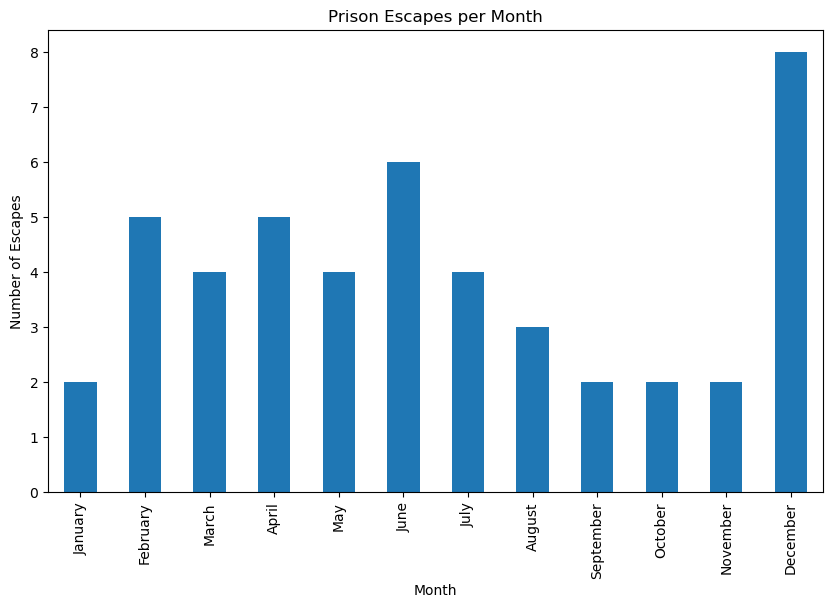

In [12]:
# Plot the number of prison escapes per month
escapes_per_month = escapes_per_month.rename(index=month_names)  # Rename month numbers to month names
escapes_per_month.plot(kind='bar', figsize=(10, 6), xlabel='Month', ylabel='Number of Escapes',
                       title='Prison Escapes per Month')


# Create a list to map day of the week numbers to day names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group the data by day of the week and count the number of escapes on each day
escapes_per_day = df.groupby('DayOfWeek').size()

# Show the plots
plt.show()

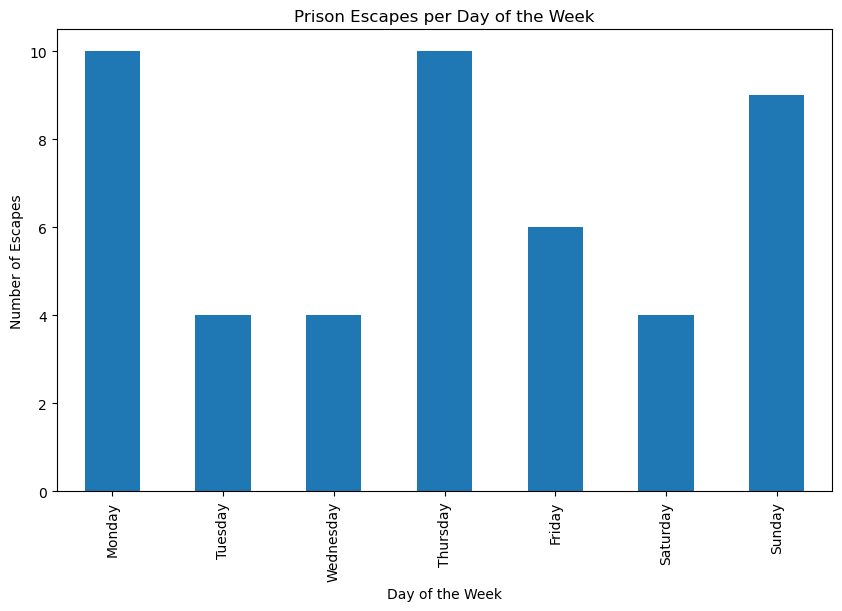

In [14]:
# Plot the number of prison escapes per day of the week
escapes_per_day.index = day_names  # Rename day of the week numbers to day names
escapes_per_day.plot(kind='bar', figsize=(10, 6), xlabel='Day of the Week', ylabel='Number of Escapes',
                     title='Prison Escapes per Day of the Week')
plt.show()

In [15]:
# Group the data by country and count the number of escapes in each country
escapes_per_country = df.groupby('Country').size()

# Sort the countries based on the number of escapes in descending order
top_countries = escapes_per_country.sort_values(ascending=False)

# Print the top countries with the highest number of recorded prison escapes
print("Countries with the Highest Number of Recorded Prison Escapes:")
print(top_countries.head(10))

Countries with the Highest Number of Recorded Prison Escapes:
Country
France            15
United States      8
Greece             4
Belgium            4
Canada             4
Brazil             2
Colombia           2
Australia          2
United Kingdom     2
Chile              1
dtype: int64


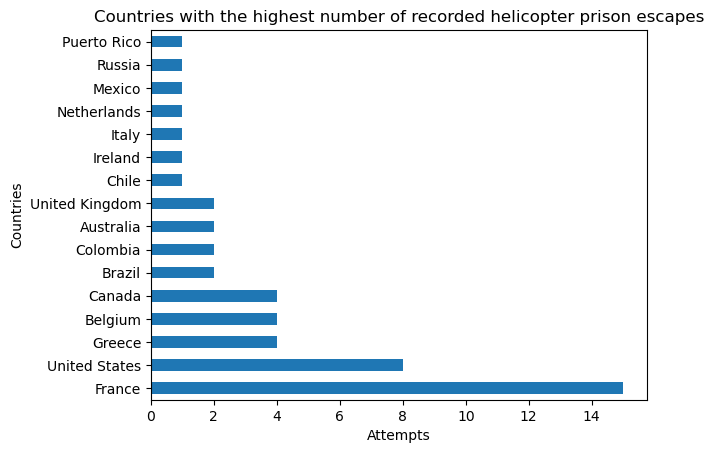

In [16]:
top_countries.plot(kind='barh')
plt.title('Countries with the highest number of recorded helicopter prison escapes')
plt.xlabel('Attempts')
plt.ylabel('Countries')
plt.show()

In [21]:
# Create a frequency table with the 'Succeeded' column
success_rate = df['Succeeded'].value_counts()['Yes']
failure_rate = df['Succeeded'].value_counts()['No']

total_rate = success_rate + failure_rate


success_percentage = success_rate * total_rate / 100
failure_percentage = failure_rate * total_rate / 100

print(f"Total: {total_rate}\nSuccess: {success_rate}\nFailure: {failure_rate} ")

Total: 50
Success: 36
Failure: 14 


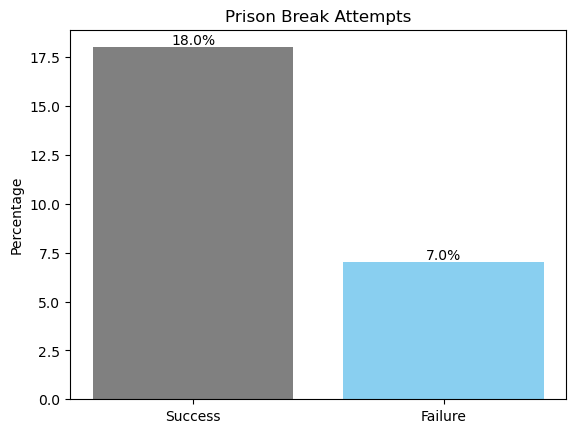

In [22]:
import matplotlib.pyplot as plt

# Assuming you have the success_percentage and failure_percentage calculated

# Create bar chart
labels = ['Success', 'Failure']
sizes = [success_percentage, failure_percentage]
colors = ['grey', '#89CFF0']

fig, ax = plt.subplots()
ax.bar(labels, sizes, color=colors)

# Add data labels to the bars
for i, v in enumerate(sizes):
    ax.text(i, v, f"{v:.1f}%", ha='center', va='bottom', color='black')

ax.set_title('Prison Break Attempts')
ax.set_ylabel('Percentage')

# Display the chart
plt.show()

In [23]:
# Calculate the average number of escapees per incident
average_escapees = df['Escapee(s)'].str.count(',') + 1
average_escapees = average_escapees.mean()

# Print the average number of escapees per incident
print("Average Number of Escapees per Incident:")
print(f"{average_escapees:.2f}")

Average Number of Escapees per Incident:
1.02


In [24]:
# Filter the DataFrame to include only rows where 'Escapee(s)' is not empty
escaped_individuals = df[df['Escapee(s)'].notnull()]

# Split the 'Escapee(s)' column to get individual escapees
individual_escapees = escaped_individuals['Escapee(s)'].str.split(',')

# Create a list to store individuals who attempted helicopter prison escapes
all_escapees = []

# Iterate over the individual_escapees list and add escapees to the all_escapees list
for escapees in individual_escapees:
    all_escapees.extend(escapees)

# Create a DataFrame to count the occurrences of each escapee
escapee_counts = pd.Series(all_escapees).value_counts()

# Filter the escapee_counts DataFrame to select escapees who attempted multiple escapes
persistent_escapees = escapee_counts[escapee_counts > 1]

# Print the persistent escapees who attempted helicopter prison escapes multiple times
print("Persistent Escapees who Attempted Multiple Helicopter Prison Escapes:")
print(persistent_escapees)

Persistent Escapees who Attempted Multiple Helicopter Prison Escapes:
—                 8
Michel Vaujour    2
Pascal Payet      2
Name: count, dtype: int64


In [27]:
# Find escapees that appear more than once
repeated_escapees = temporary_df['Escapee(s)'][temporary_df['Escapee(s)'].duplicated()].unique()

# Filter rows where 'Escapee(s)' contains any of these repeated names
duplicated_df = temporary_df[temporary_df['Escapee(s)'].str.contains('|'.join(repeated_escapees))]

# Reorder columns if needed
column_order = ['Escapee(s)', 'Succeeded', 'Prison name', 'Date', 'Country']
duplicated_df = duplicated_df.reindex(columns=column_order)
print(duplicated_df)


        Escapee(s) Succeeded             Prison name       Date      Country
8   Michel Vaujour       Yes      Prison de la Santé 1986-05-26       France
14               —       Yes  Cárcel Bellavista, ... 1988-12-23     Colombia
19               —       Yes             Lyon Prison 1992-02-24       France
20               —        No  Touraine Central Pr...        NaT       France
21  Michel Vaujour        No  Touraine Central Pr... 1993-06-17       France
23               —        No     De Geerhorst prison 1997-09-18  Netherlands
26               —       Yes             Lyon prison 2000-12-13       France
27    Pascal Payet       Yes           Luynes prison 2001-01-19       France
29               —        No          Fresnes prison 2001-05-28       France
30               —       Yes  Parada Neto Peniten... 2002-01-17       Brazil
33               —        No                  France        NaT       France
37    Pascal Payet       Yes           Grasse prison 2007-07-15       France